**STARTUP FUNDING PREDICTION USING MACHINE LEARNING**

In [763]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/startup_funding.csv') #reading startup funding dataset

In [764]:
df.head() #It returns first 5 rows of the dataset

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN


In [765]:
df.info() #returns column names,non null count and datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [766]:
df.describe(include='all') #returns descriptive statistics of the dataset

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
count,2372.000000,2372,2372,2201,1436,2193,2364,2371,1525,419
unique,NaN,698,2001,743,1364,71,1885,7,328,69
top,NaN,02-02-2015,Swiggy,Consumer Internet,Online Pharmacy,Bangalore,Undisclosed Investors,Seed Funding,"10,00,000",Series A
freq,NaN,11,7,772,9,627,33,1271,130,177
mean,1185.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,684.881742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,592.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1185.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1778.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [767]:
df.columns #returns names of the each columns of dataset

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [768]:
df=df.drop(columns={'SNo','StartupName','InvestorsName'}) #Dropped non important columns
df

,Date,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD,Remarks
0,01-08-2017,Technology,Predictive Care Platform,Bangalore,Private Equity,"13,00,000",NaN
1,02-08-2017,Technology,Digital Marketing Agency,Mumbai,Private Equity,NaN,NaN
2,02-08-2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,Seed Funding,NaN,NaN
3,02-08-2017,Consumer Internet,DIY Ecommerce platform,Mumbai,Seed Funding,"5,00,000",NaN
4,02-08-2017,Consumer Internet,healthcare service aggregator,Hyderabad,Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...
2367,29-01-2015,NaN,NaN,NaN,Private Equity,"45,00,000",NaN
2368,29-01-2015,NaN,NaN,NaN,Private Equity,"8,25,000",Govt backed VC Fund
2369,30-01-2015,NaN,NaN,NaN,Private Equity,"15,00,000",NaN
2370,30-01-2015,NaN,NaN,NaN,Private Equity,NaN,"Strategic Funding, Minority stake"


In [769]:
df['Funded']=df['AmountInUSD'].notnull().astype(int) #Checked the amount is Blank or not using notull().It returns Yes or No. And converted Yes/No to 0 and 1 using astype

In [770]:
df #print df

,Date,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD,Remarks,Funded
0,01-08-2017,Technology,Predictive Care Platform,Bangalore,Private Equity,"13,00,000",NaN,1
1,02-08-2017,Technology,Digital Marketing Agency,Mumbai,Private Equity,NaN,NaN,0
2,02-08-2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,Seed Funding,NaN,NaN,0
3,02-08-2017,Consumer Internet,DIY Ecommerce platform,Mumbai,Seed Funding,"5,00,000",NaN,1
4,02-08-2017,Consumer Internet,healthcare service aggregator,Hyderabad,Seed Funding,"8,50,000",NaN,1
...,...,...,...,...,...,...,...,...
2367,29-01-2015,NaN,NaN,NaN,Private Equity,"45,00,000",NaN,1
2368,29-01-2015,NaN,NaN,NaN,Private Equity,"8,25,000",Govt backed VC Fund,1
2369,30-01-2015,NaN,NaN,NaN,Private Equity,"15,00,000",NaN,1
2370,30-01-2015,NaN,NaN,NaN,Private Equity,NaN,"Strategic Funding, Minority stake",0


In [771]:
df

,Date,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD,Remarks,Funded
0,01-08-2017,Technology,Predictive Care Platform,Bangalore,Private Equity,"13,00,000",NaN,1
1,02-08-2017,Technology,Digital Marketing Agency,Mumbai,Private Equity,NaN,NaN,0
2,02-08-2017,Consumer Internet,Online platform for Higher Education Services,New Delhi,Seed Funding,NaN,NaN,0
3,02-08-2017,Consumer Internet,DIY Ecommerce platform,Mumbai,Seed Funding,"5,00,000",NaN,1
4,02-08-2017,Consumer Internet,healthcare service aggregator,Hyderabad,Seed Funding,"8,50,000",NaN,1
...,...,...,...,...,...,...,...,...
2367,29-01-2015,NaN,NaN,NaN,Private Equity,"45,00,000",NaN,1
2368,29-01-2015,NaN,NaN,NaN,Private Equity,"8,25,000",Govt backed VC Fund,1
2369,30-01-2015,NaN,NaN,NaN,Private Equity,"15,00,000",NaN,1
2370,30-01-2015,NaN,NaN,NaN,Private Equity,NaN,"Strategic Funding, Minority stake",0


In [772]:
df.isnull().sum() #checked for null values in each column

,0
Date,0
IndustryVertical,171
SubVertical,936
CityLocation,179
InvestmentType,1
AmountInUSD,847
Remarks,1953
Funded,0


In [773]:
df.shape  #returns number of rows and columns

(2372, 8)

In [774]:
def missing_value_report(df):
    missing_count = df.isnull().sum()
    missing_percentage=(missing_count/len(df)) *100.
    report=pd.DataFrame({
        'Missing values':missing_count,
        'Missing percentage':missing_percentage.round(2)
    })
    return report[report['Missing values']>0].sort_values(by='Missing percentage',ascending=False)
print(missing_value_report(df))  #Finding Missing values and Missing percentage of each column.

                  Missing values  Missing percentage
Remarks                     1953               82.34
SubVertical                  936               39.46
AmountInUSD                  847               35.71
CityLocation                 179                7.55
IndustryVertical             171                7.21
InvestmentType                 1                0.04


In [775]:
#Data cleaning

In [776]:
df.drop(columns=['Remarks'],inplace=True) #Dropped remarks column, not an important column
df.drop(columns=['SubVertical'],inplace=True) #Dropped subvertical column, too messy


In [777]:
df['InvestmentType'].fillna(df['InvestmentType'].mode()[0],inplace=True) #One value missing,filled with mode

In [778]:
df.dropna(subset=['IndustryVertical','CityLocation'],inplace=True)  #Dropped missing values

In [779]:
df.isnull().sum() #checking number of null values in each column

,0
Date,0
IndustryVertical,0
CityLocation,0
InvestmentType,0
AmountInUSD,803
Funded,0


In [780]:
df

,Date,IndustryVertical,CityLocation,InvestmentType,AmountInUSD,Funded
0,01-08-2017,Technology,Bangalore,Private Equity,"13,00,000",1
1,02-08-2017,Technology,Mumbai,Private Equity,NaN,0
2,02-08-2017,Consumer Internet,New Delhi,Seed Funding,NaN,0
3,02-08-2017,Consumer Internet,Mumbai,Seed Funding,"5,00,000",1
4,02-08-2017,Consumer Internet,Hyderabad,Seed Funding,"8,50,000",1
...,...,...,...,...,...,...
2196,29-04-2015,Startup Analytics platform,Bangalore,Private Equity,"35,00,000",1
2197,29-04-2015,Mobile Food Ordering app,Bangalore,Seed Funding,NaN,0
2198,29-04-2015,Financial Markets Software,Bangalore,Seed Funding,"4,00,000",1
2199,29-04-2015,Hiring Analytics platform,Chennai,Seed Funding,"5,00,000",1


In [781]:
#df['Date']=pd.to_datetime(df['Date'], errors='coerce')
#df['year']=df['Date'].dt.year
#df['Month']=df['Date'].dt.month
#df['Quarter']=df['Date'].dt.quarter
#df.drop(columns=['Date'], inplace=True)

In [782]:
#df.dropna(subset=['year','Month','Quarter'],inplace=True)  #Dropped missing values

In [783]:
df_encode=pd.get_dummies(df,columns=['CityLocation','IndustryVertical','InvestmentType'],drop_first=True) #applied one hot encoding

In [784]:
df_encode

,Date,AmountInUSD,Funded,CityLocation_Ahmedabad,CityLocation_Bangalore,CityLocation_Bangalore / Palo Alto,CityLocation_Bangalore / SFO,CityLocation_Bangalore / San Mateo,CityLocation_Bangalore / USA,CityLocation_Bangalore/ Bangkok,...,IndustryVertical_pre-owned Luxury online apparel seller,IndustryVertical_pre-used apparel shopping mobile app,IndustryVertical_pre-used luxury item Marketplace,IndustryVertical_proximity marketing & Mobile Advertising platform,IndustryVertical_residential rental management platform,IndustryVertical_solar products and services marketplace,"IndustryVertical_virtual reality, 3d simulation and stereoscopic products",IndustryVertical_visual search and discovery platform,InvestmentType_Private Equity,InvestmentType_Seed Funding
0,01-08-2017,"13,00,000",1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,02-08-2017,NaN,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,02-08-2017,NaN,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,02-08-2017,"5,00,000",1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,02-08-2017,"8,50,000",1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,29-04-2015,"35,00,000",1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2197,29-04-2015,NaN,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2198,29-04-2015,"4,00,000",1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2199,29-04-2015,"5,00,000",1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [785]:
df.columns

Index(['Date', 'IndustryVertical', 'CityLocation', 'InvestmentType',
       'AmountInUSD', 'Funded'],
      dtype='object')

In [786]:
df['IndustryVertical'].value_counts()

,count
IndustryVertical,
Consumer Internet,767
Technology,313
eCommerce,171
ECommerce,53
Healthcare,30
...,...
Home Made Food Marketplace,1
residential rental management platform,1
Personalized Stock Intelligence Platform,1


In [787]:
df['IndustryVertical']=df['IndustryVertical'].replace('eCommerce','ECommerce') #ecommerce replaced with Ecommerce

In [788]:
df['IndustryVertical'].value_counts()

,count
IndustryVertical,
Consumer Internet,767
Technology,313
ECommerce,224
Healthcare,30
Logistics,24
...,...
residential rental management platform,1
Personalized Stock Intelligence Platform,1
Personal Diagnostic Mobile App,1


EDA - Exploratory Data Analysis

In [789]:
df['AmountInUSD']

,AmountInUSD
0,"13,00,000"
1,NaN
2,NaN
3,"5,00,000"
4,"8,50,000"
...,...
2196,"35,00,000"
2197,NaN
2198,"4,00,000"
2199,"5,00,000"


In [790]:
#Distribution of Funding Income using Countplot

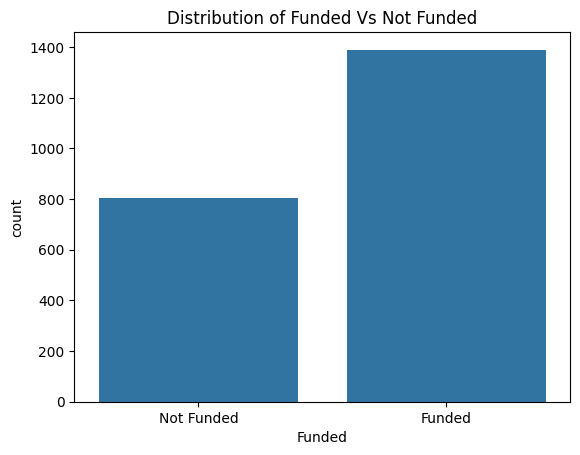

In [791]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Funded') #refering to Funded column of dataframe
plt.title("Distribution of Funded Vs Not Funded") #title
plt.xticks([0,1],['Not Funded','Funded'])
plt.show()


In [792]:
#Top 10 Funded Industry Verticals

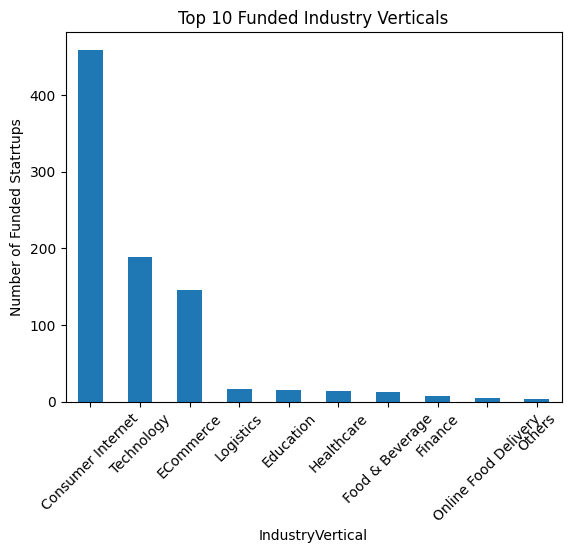

In [793]:
top_industries = df[df['Funded']==1]['IndustryVertical'].value_counts().head(10)
top_industries.plot(kind='bar',title="Top 10 Funded Industry Verticals")
plt.ylabel('Number of Funded Statrtups')
plt.xticks(rotation=45)
plt.show()

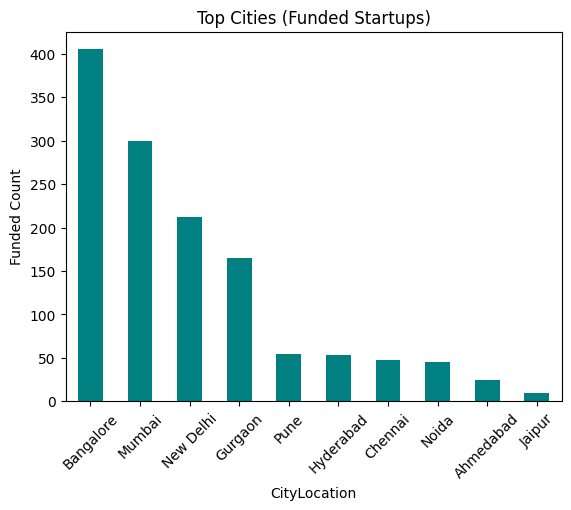

In [794]:
#Top Cities for Funded Startups

top_cities=df[df['Funded']==1]['CityLocation'].value_counts().head(10)
top_cities.plot(kind='bar',title='Top Cities (Funded Startups)',color='teal')
plt.ylabel('Funded Count')
plt.xticks(rotation=45)
plt.show()

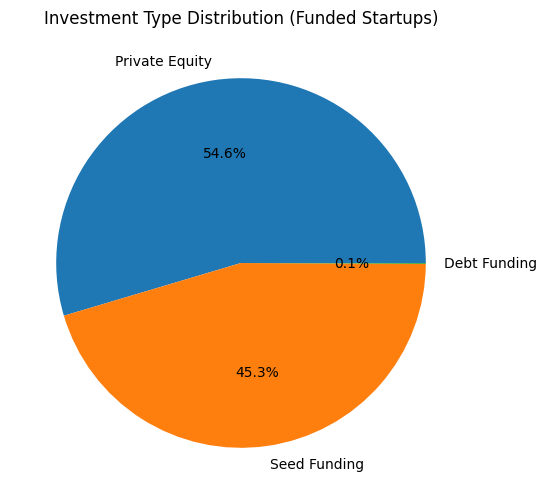

In [795]:
#Top Investment Type Distribution (Funded Only)
top_investment=df[df['Funded']==1]['InvestmentType'].value_counts()
top_investment.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6))
plt.title("Investment Type Distribution (Funded Startups)")
plt.ylabel("")
plt.show()

In [796]:
df['AmountInUSD']

,AmountInUSD
0,"13,00,000"
1,NaN
2,NaN
3,"5,00,000"
4,"8,50,000"
...,...
2196,"35,00,000"
2197,NaN
2198,"4,00,000"
2199,"5,00,000"


In [797]:
df['AmountInUSD'].dtype
df['AmountInUSD'].describe()


,AmountInUSD
count,1390
unique,311
top,"10,00,000"
freq,122


In [798]:

x=df_encode.drop(columns=['AmountInUSD','Funded','Date']) #we didn't include AmountInUSD,it may cause direct data leakage
y=df_encode['Funded']

In [799]:
x

,CityLocation_Ahmedabad,CityLocation_Bangalore,CityLocation_Bangalore / Palo Alto,CityLocation_Bangalore / SFO,CityLocation_Bangalore / San Mateo,CityLocation_Bangalore / USA,CityLocation_Bangalore/ Bangkok,CityLocation_Belgaum,CityLocation_Bhopal,CityLocation_Boston,...,IndustryVertical_pre-owned Luxury online apparel seller,IndustryVertical_pre-used apparel shopping mobile app,IndustryVertical_pre-used luxury item Marketplace,IndustryVertical_proximity marketing & Mobile Advertising platform,IndustryVertical_residential rental management platform,IndustryVertical_solar products and services marketplace,"IndustryVertical_virtual reality, 3d simulation and stereoscopic products",IndustryVertical_visual search and discovery platform,InvestmentType_Private Equity,InvestmentType_Seed Funding
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2197,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2198,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [800]:
y

,Funded
0,1
1,0
2,0
3,1
4,1
...,...
2196,1
2197,0
2198,1
2199,1


In [801]:
#Model Creation

In [802]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) #train_test_split

In [803]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)

#Evaluate
print("Logistic Regression")
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))


Logistic Regression
[[ 37 138]
 [ 34 230]]
              precision    recall  f1-score   support

           0       0.52      0.21      0.30       175
           1       0.62      0.87      0.73       264

    accuracy                           0.61       439
   macro avg       0.57      0.54      0.51       439
weighted avg       0.58      0.61      0.56       439



In [804]:
#Checking effect of values in outcome
coef=pd.DataFrame({'Feature':X_train.columns,'Coefficient' :lr_model.coef_[0]})
coef=coef.sort_values(by='Coefficient',key=abs,ascending=True)
print(coef[coef['Coefficient']>0.01])

                                           Feature  Coefficient
780                     IndustryVertical_ecommerce     0.051476
592                        IndustryVertical_Others     0.056794
1                           CityLocation_Bangalore     0.109421
67                           CityLocation_Vadodara     0.117365
58                          CityLocation_Singapore     0.119252
..                                             ...          ...
384           IndustryVertical_Job Search Platform     0.580913
380   IndustryVertical_Internet of Things platform     0.591173
507          IndustryVertical_Online Food Delivery     0.616390
20                            CityLocation_Gwalior     0.626255
350  IndustryVertical_Hyperlocal Handyman Services     0.641247

[445 rows x 2 columns]


In [805]:
#Model creation by Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

#Evaluate
print("RandomForestClassifier")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


RandomForestClassifier
[[ 52 123]
 [ 64 200]]
              precision    recall  f1-score   support

           0       0.45      0.30      0.36       175
           1       0.62      0.76      0.68       264

    accuracy                           0.57       439
   macro avg       0.53      0.53      0.52       439
weighted avg       0.55      0.57      0.55       439



In [806]:
top_n=20
important=rf_model.feature_importances_
feat_imp=pd.DataFrame({'Feature':X_train.columns,'Importancee':important})
feat_imp=feat_imp.sort_values(by='Importancee',ascending=False).head(20)
print(feat_imp.head(10))

                                Feature  Importancee
809       InvestmentType_Private Equity     0.070040
810         InvestmentType_Seed Funding     0.064372
164  IndustryVertical_Consumer Internet     0.025922
726         IndustryVertical_Technology     0.023899
312         IndustryVertical_Healthcare     0.020108
775          IndustryVertical_eCommerce     0.014828
42               CityLocation_New Delhi     0.013586
1                CityLocation_Bangalore     0.012879
217          IndustryVertical_ECommerce     0.012250
26                  CityLocation_Jaipur     0.011955


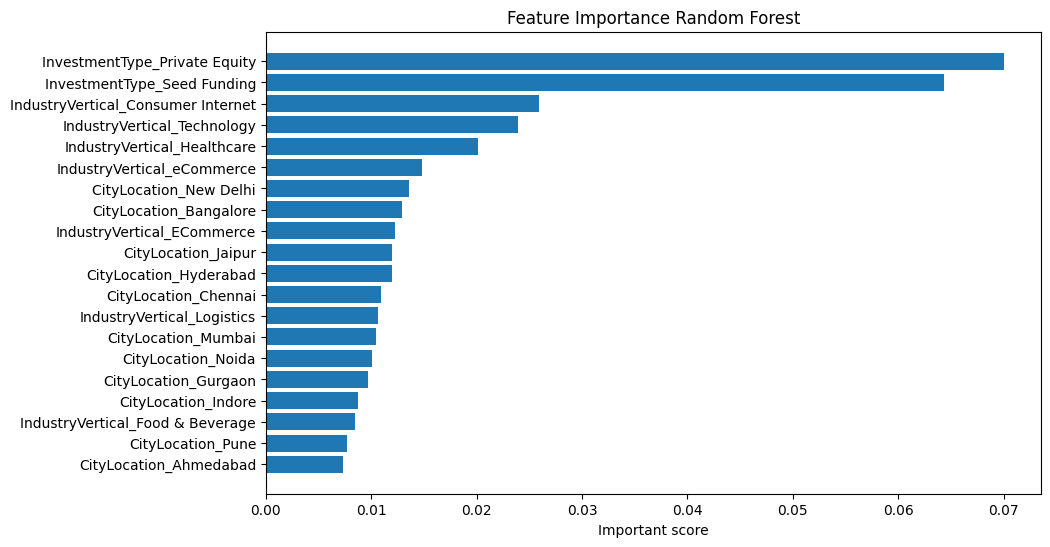

In [807]:
#Feature importance figure
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'],feat_imp['Importancee'])
plt.gca().invert_yaxis()
plt.title("Feature Importance Random Forest")
plt.xlabel("Important score")
plt.show()


In [808]:
#CROSS VALIDATION

In [809]:
from sklearn.model_selection import cross_val_score
rf_scores=cross_val_score(rf_model,X_train,y_train,cv=5,scoring='f1')
print("Random forest F1 scores :",rf_scores)
print("Random forest Avg F1 score :",rf_scores.mean())

Random forest F1 scores : [0.68803419 0.73500967 0.71372549 0.67982456 0.72      ]
Random forest Avg F1 score : 0.7073187821627318


In [810]:
#Logistic Regression

In [811]:
lr_scores = cross_val_score(lr_model,X_train,y_train,cv=5,scoring='f1')
print("Logistic Regression F1 scores:",lr_scores)
print("Logistic Regression Avg F1 scores",lr_scores.mean())

Logistic Regression F1 scores: [0.736      0.76865672 0.74285714 0.75048356 0.76679842]
Logistic Regression Avg F1 scores 0.7529591674483165


In [812]:
#HyperParameter Tuning

In [813]:
from sklearn.model_selection import GridSearchCV  #Define the parameter grid
param_grid = {
    'n_estimators' :[50,100,200],
    'max_depth' :[None,10,20],
    'min_samples_split' :[2,5],
    'min_samples_leaf' : [1,2]

}
rf_tuned = RandomForestClassifier(random_state=42) #model created
grid_search = GridSearchCV(estimator=rf_tuned,param_grid=param_grid,cv=5,scoring='f1',verbose=1,n_jobs=-1) #Use all CPU scores
grid_search.fit(X_train,y_train)
best_rf=grid_search.best_estimator_
print("Best Parameters :",grid_search.best_params_)
print("Best F1 score from CV :",grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters : {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score from CV : 0.7853604991086465


In [814]:
#Evaluate tuned model on test set

In [815]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
y_pred = best_rf.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print("F1 score :",f1_score(y_test,y_pred))
print("Classification Report :]\n",classification_report(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))


Accuracy : 0.5968109339407744
F1 score : 0.743849493487699
Classification Report :]
               precision    recall  f1-score   support

           0       0.42      0.03      0.05       175
           1       0.60      0.97      0.74       264

    accuracy                           0.60       439
   macro avg       0.51      0.50      0.40       439
weighted avg       0.53      0.60      0.47       439

Confusion Matrix :
 [[  5 170]
 [  7 257]]
